# Create maps showing proportion of population over 65 years old, for each IVT unit catchment

Using the datafile as created from notebook 02_combine_demographic_data.ipynb, create a map of proportion of population over 65 within each IVT unit catchment.

To help with geopandas use https://github.com/MichaelAllen1966/2010_geopandas/blob/main/geopandas_1.ipynb

Import libraries

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import os
from matplotlib.transforms import Bbox
import matplotlib.colors as colors
import random
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Read in Index of Multiple Deprivation data (per LSOA)

In [2]:
df_lsoa = pd.read_csv(f'./data/collated_data.csv')
#df_lsoa.set_index(['LSOA'], inplace=True)

Look at first few rows

In [3]:
df_lsoa.head()

LSOA  admissions closest_ivt_unit  closest_ivt_unit_time  \
0  Welwyn Hatfield 010F    0.666667           SG14AB                   18.7   
1  Welwyn Hatfield 012A    4.000000           SG14AB                   19.8   
2  Welwyn Hatfield 002F    2.000000           SG14AB                   18.7   
3  Welwyn Hatfield 002E    0.666667           SG14AB                   18.7   
4  Welwyn Hatfield 010A    3.333333           SG14AB                   18.7   

  closest_mt_unit  closest_mt_unit_time  mt_transfer_time  ivt_rate  \
0          NW12BU                  36.9              46.6       6.8   
1          NW12BU                  36.9              46.6       6.8   
2          NW12BU                  38.0              46.6       6.8   
3          NW12BU                  36.9              46.6       6.8   
4          NW12BU                  36.9              46.6       6.8   

   IMD2019Score Local Authority District name (2019)  ...  age band males 50  \
0        15.616                      Welwyn Hatfield  ...               53.0   
1        33.313                      Welwyn Hatfield  ...               58.0   
2         7.043                      Welwyn Hatfield  ...               43.0   
3         8.249                      Welwyn Hatfield  ...               42.0   
4        19.271                      Welwyn Hatfield  ...               56.0   

   age band males 55  age band males 60  age band males 65  age band males 70  \
0               62.0               37.0               32.0               27.0   
1               63.0               43.0               36.0               25.0   
2               50.0               51.0               21.0               31.0   
3               63.0               33.0               20.0               15.0   
4               54.0               37.0               32.0               28.0   

   age band males 75  age band males 80  age band males 85  age band males 90  \
0               30.0               15.0                4.0                3.0   
1               14.0               15.0                9.0                7.0   
2                8.0                5.0                8.0                5.0   
3               18.0               18.0                5.0                1.0   
4               21.0               12.0                9.0                2.0   

   age band males 95  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0  

[5 rows x 140 columns]

Group data by "closest_ivt_unit" and calculate the proportion of population over 65 years old.

https://stackoverflow.com/questions/31521027/groupby-weighted-average-and-sum-in-pandas-dataframe

In [4]:
cols = ['All persons','age band 65','age band 70','age band 75','age band 80','age band 85','age band 90','age band 95']
ivt_catchment_ages = df_lsoa.groupby(['closest_ivt_unit'])[cols].sum()
cols = ['age band 65','age band 70','age band 75','age band 80','age band 85','age band 90','age band 95']
ivt_catchment_ages['age band over 65'] = ivt_catchment_ages[cols].sum(axis=1)
ivt_catchment_ages['proportion over 65'] = ivt_catchment_ages['age band over 65']/ivt_catchment_ages['All persons']
ivt_catchment_ages

All persons  age band 65  age band 70  age band 75  \
closest_ivt_unit                                                       
B152TH               959513.0      39508.0      35919.0      26134.0   
B714HJ              1008460.0      43093.0      40044.0      30131.0   
BA13NG               477413.0      26781.0      26934.0      18086.0   
BA214AT              272334.0      18983.0      19019.0      13151.0   
BB23HH               481355.0      25425.0      23924.0      15503.0   
...                       ...          ...          ...          ...   
WD180HB              588745.0      26936.0      26202.0      18209.0   
WF14DG               581851.0      31174.0      29790.0      19840.0   
WR51DD               407078.0      25827.0      25612.0      17562.0   
WV100QP              647550.0      33227.0      32194.0      23900.0   
YO318HE              528723.0      31229.0      31669.0      21164.0   

                  age band 80  age band 85  age band 90  age band 95  \
closest_ivt_unit                                                       
B152TH                20464.0      13070.0       7474.0          0.0   
B714HJ                22703.0      14049.0       7607.0          0.0   
BA13NG                13762.0       8546.0       5146.0          0.0   
BA214AT                9361.0       6031.0       3794.0          0.0   
BB23HH                11196.0       6537.0       3604.0          0.0   
...                       ...          ...          ...          ...   
WD180HB               14897.0       9734.0       5899.0          0.0   
WF14DG                14399.0       8161.0       4512.0          0.0   
WR51DD                12839.0       8164.0       4931.0          0.0   
WV100QP               16956.0      10093.0       5459.0          0.0   
YO318HE               16264.0       9784.0       5711.0          0.0   

                  age band over 65  proportion over 65  
closest_ivt_unit                                        
B152TH                    142569.0            0.148585  
B714HJ                    157627.0            0.156305  
BA13NG                     99255.0            0.207902  
BA214AT                    70339.0            0.258282  
BB23HH                     86189.0            0.179055  
...                            ...                 ...  
WD180HB                   101877.0            0.173041  
WF14DG                    107876.0            0.185401  
WR51DD                     94935.0            0.233211  
WV100QP                   121829.0            0.188138  
YO318HE                   115821.0            0.219058  

[113 rows x 10 columns]

Map the data.

Load IVT catchment shape file (created in notebook "03_create_ivt_catchment_shapefile_and_map.ipynb" by dissolving LSOA polygons that are in the same IVT unit catchment).

https://geopandas.org/aggregation_with_dissolve.html

The following will load the shape file of the catchments for the IVT units in England and Wales into a GeoPandas DataFrame. Note that we can set the crs (Coordinate Reference System) when loading a GeoPandas DataFrame. EPSG:27700 is the crs to use when geography is in BNG (British National Grid Eastings and Northings).

EPSG:27700 OSGB 1936 / British National Grid -- United Kingdom Ordnance Survey. Co-ordinates are in Eastings (X) and Northings (Y). EPSG:4326 WGS 84 -- WGS84 - World Geodetic System 1984. Co-ordinates are in Longitude (X) and Latitude (Y). EPSG:3857 - projection for displaying lat/long as a flat map

In [5]:
filename = f"data/ivt_catchment.shp"
exist = os.path.exists(filename)

if exist:
    # Read in
    gdf_ivt_catchment = gpd.read_file(filename, crs='EPSG:27700')
else:
    print('Run "03_create_ivt_catchment_shapefile_and_map.ipynb" first')
gdf_ivt_catchment.head()

closest_iv                           LSOA11NM   LSOA11CD  \
0     B152TH                    Birmingham 067A  E01008881   
1     B714HJ                    Birmingham 037A  E01008899   
2     BA13NG  Bath and North East Somerset 007A  E01014370   
3    BA214AT                    East Devon 005A  E01019886   
4     BB23HH                        Bolton 001B  E01004803   

                           LSOA11NMW  \
0                    Birmingham 067A   
1                    Birmingham 037A   
2  Bath and North East Somerset 007A   
3                    East Devon 005A   
4                        Bolton 001B   

                                            geometry  
0  MULTIPOLYGON (((416346.099 267790.717, 416204....  
1  MULTIPOLYGON (((395851.844 272307.409, 395947....  
2  POLYGON ((391028.906 148190.250, 391138.688 14...  
3  MULTIPOLYGON (((330557.896 98588.730, 330365.5...  
4  POLYGON ((371685.702 414415.737, 371465.678 41...

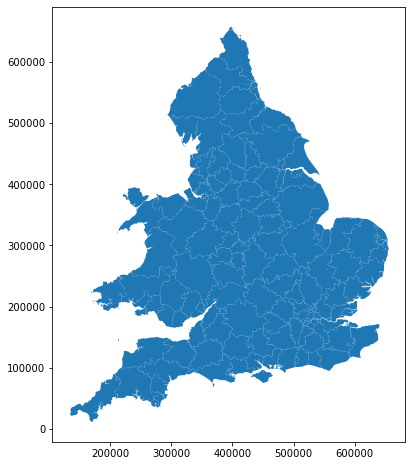

In [6]:
gdf_ivt_catchment.plot(figsize=(8,8));

#filename = 'zip://./data/Lower_Layer_Super_Output_Areas_December_2011_Full_Clipped__Boundaries_in_England_and_Wales.zip'
filename = 'zip://./data/Lower_layer_super_output_areas_(E+W)_2011_Boundaries_(Generalised_Clipped)_V2.zip'
gdf_lsoa = gpd.read_file(filename, crs='EPSG:27700')
gdf_lsoa.head()
gdf_lsoa.plot(figsize=(8,8));


Merging areas together
Now we are going to merge LSOAs that are in the same IVT unit catchment (we can merge on any column in order to combine areas). This will create a new DataFrame. To merge areas we use the dissolve() method.

https://geopandas.org/aggregation_with_dissolve.html

But first need to add a column to the geopandas dataframe. Using LSOA as the common value, bring in the field 'closest_ivt_unit'

Match lsoa_gdf['LSOA11NMW'] with lsoa_df['LSOA'] and add lsoa_df['closest_ivt_unit'] to lsoa_gdf['closest_ivt_unit'].
https://stackoverflow.com/questions/39816671/pandas-populate-new-dataframe-column-based-on-matching-columns-in-another-datafr
    
df_lsoa.set_index(['LSOA'], inplace=True)
gdf_lsoa.set_index(['LSOA11NMW'], inplace=True)

gdf_lsoa = gdf_lsoa.join(df_lsoa['closest_ivt_unit']).reset_index()
gdf_lsoa.head()
gdf_ivt_catchment = gdf_lsoa.dissolve(by='closest_ivt_unit')
gdf_ivt_catchment
gdf_ivt_catchment.plot(figsize=(8,8));

Add data about age, joining based on 'closest_ivt_unit'

In [7]:
gdf_ivt_catchment.set_index(['closest_iv'], inplace=True)
gdf_ivt_catchment = gdf_ivt_catchment.join(ivt_catchment_ages[['All persons','proportion over 65']]).reset_index()
gdf_ivt_catchment.head()

closest_iv                           LSOA11NM   LSOA11CD  \
0     B152TH                    Birmingham 067A  E01008881   
1     B714HJ                    Birmingham 037A  E01008899   
2     BA13NG  Bath and North East Somerset 007A  E01014370   
3    BA214AT                    East Devon 005A  E01019886   
4     BB23HH                        Bolton 001B  E01004803   

                           LSOA11NMW  \
0                    Birmingham 067A   
1                    Birmingham 037A   
2  Bath and North East Somerset 007A   
3                    East Devon 005A   
4                        Bolton 001B   

                                            geometry  All persons  \
0  MULTIPOLYGON (((416346.099 267790.717, 416204....     959513.0   
1  MULTIPOLYGON (((395851.844 272307.409, 395947....    1008460.0   
2  POLYGON ((391028.906 148190.250, 391138.688 14...     477413.0   
3  MULTIPOLYGON (((330557.896 98588.730, 330365.5...     272334.0   
4  POLYGON ((371685.702 414415.737, 371465.678 41...     481355.0   

   proportion over 65  
0            0.148585  
1            0.156305  
2            0.207902  
3            0.258282  
4            0.179055

Mapping data with MatPlotLib

Using MatPlotLib gives us more power than the GeoPandas DataFrame plot method.

Read in hospital data
(Stroke Team, SSNAP name, Easting, Northing)

In [8]:
gdf_units = gpd.read_file('./data/stroke_hospitals_2022.csv')

gdf_units["geometry"] = gpd.points_from_xy(
        gdf_units.Easting, gdf_units.Northing)
gdf_units = gdf_units.set_crs(epsg=27700)

# Restrict dataset to hospitals that deliver IVT
mask = gdf_units['Use_IVT']=="1"
gdf_units = gdf_units[mask]
gdf_units.head()

Postcode Hospital_name Use_IVT Use_MT  Country Strategic Clinical Network  \
0   RM70AG        RM70AG       1      1  England                 London SCN   
1    E11BB         E11BB       1      1  England                 London SCN   
2   SW66SX        SW66SX       1      1  England                 London SCN   
3   SE59RW        SE59RW       1      1  England                 London SCN   
4   BR68ND        BR68ND       1      0  England                 London SCN   

                                Health Board / Trust  \
0  Barking; Havering and Redbridge University Hos...   
1                             Barts Health NHS Trust   
2              Imperial College Healthcare NHS Trust   
3       King's College Hospital NHS Foundation Trust   
4       King's College Hospital NHS Foundation Trust   

                                     Stroke Team  \
0                      Queen's Hospital, Romford   
1                      The Royal London Hospital   
2                 Charing Cross Hospital, London   
3                King's College Hospital, London   
4  Princess Royal University Hospital; Orpington   

                                SSNAP name Admissions 21/22 Thrombolysis  \
0             Queens Hospital Romford HASU              981          117   
1               Royal London Hospital HASU              861          115   
2              Charing Cross Hospital HASU             1147          113   
3             King's College Hospital HASU              824          124   
4  Princess Royal University Hospital HASU              847          113   

  ivt_rate Easting Northing Neuroscience 30 England Thrombectomy Example  \
0     11.9  551118   187780            1                               0   
1     13.4  534829   181798            1                               1   
2      9.9  524226   176487            1                               1   
3       15  532536   176228            1                               0   
4     13.3  543443   165032            0                               0   

    hospital_city Notes                       geometry  
0         Romford        POINT (551118.000 187780.000)  
1    Royal London        POINT (534829.000 181798.000)  
2   Charing Cross        POINT (524226.000 176487.000)  
3   Kings College        POINT (532536.000 176228.000)  
4  Princess Royal        POINT (543443.000 165032.000)

In [9]:
# When using base maps convert data to epsg:3857
gdf_ivt_catchment = gdf_ivt_catchment.to_crs(epsg=3857)
gdf_units = gdf_units.to_crs(epsg=3857)

In [10]:
def add_nonoverlapping_text_labels(gdf_units, ax, col, y_step=0.05, fontsize=7):
    """
    #https://stackoverflow.com/questions/43916834/matplotlib-dynamically-change-text-position


    """

    text_rectangles = []

    # Better results if the labels are sorted descending in the y axis
    gdf_units['sort_by'] = gdf_units.geometry.y
    gdf_units.sort_values("sort_by", ascending=False, inplace=True)
    del gdf_units["sort_by"]

    # Add labels
    for x, y, label in zip(
        gdf_units.geometry.x, gdf_units.geometry.y, gdf_units[col]):
            text = ax.annotate(label, xy=(x, y), xytext=(8, 8), 
                        textcoords="offset points", fontsize=fontsize, 
                        bbox=dict(facecolor='w', alpha=0.3, edgecolor='none', boxstyle="round", pad=0.1))
            x, y = text.get_position()
            new_x = x - 2
            text.set_position((new_x, y))
                    
            rect = text.get_window_extent()

            for other_rect in text_rectangles:
                while Bbox.intersection(rect, other_rect):  # overlapping
                    x, y = text.get_position()
                    new_y = y - y_step
                    text.set_position((x, new_y))
                    rect = text.get_window_extent()
            text_rectangles.append(rect)
    return (ax)

In [11]:
eng_wales_bounds = gdf_ivt_catchment.bounds
eng_wales_bounds = eng_wales_bounds.merge(gdf_ivt_catchment['closest_iv'],how = 'left',
                      left_on = eng_wales_bounds.index,
                      right_on = gdf_ivt_catchment.index)
eng_wales_bounds = eng_wales_bounds.set_index('closest_iv')
eng_wales_bounds.drop('key_0', axis = 1, inplace = True)
eng_wales_bounds.head()

minx          miny           maxx          maxy
closest_iv                                                          
B152TH     -228159.802962  6.840962e+06 -186486.338536  6.891587e+06
B714HJ     -230754.673759  6.862190e+06 -174024.968174  6.926919e+06
BA13NG     -301440.775912  6.639528e+06 -220910.832420  6.742989e+06
BA214AT    -338714.448556  6.574692e+06 -241766.759874  6.661788e+06
BB23HH     -293523.883294  7.097870e+06 -227656.460963  7.179456e+06

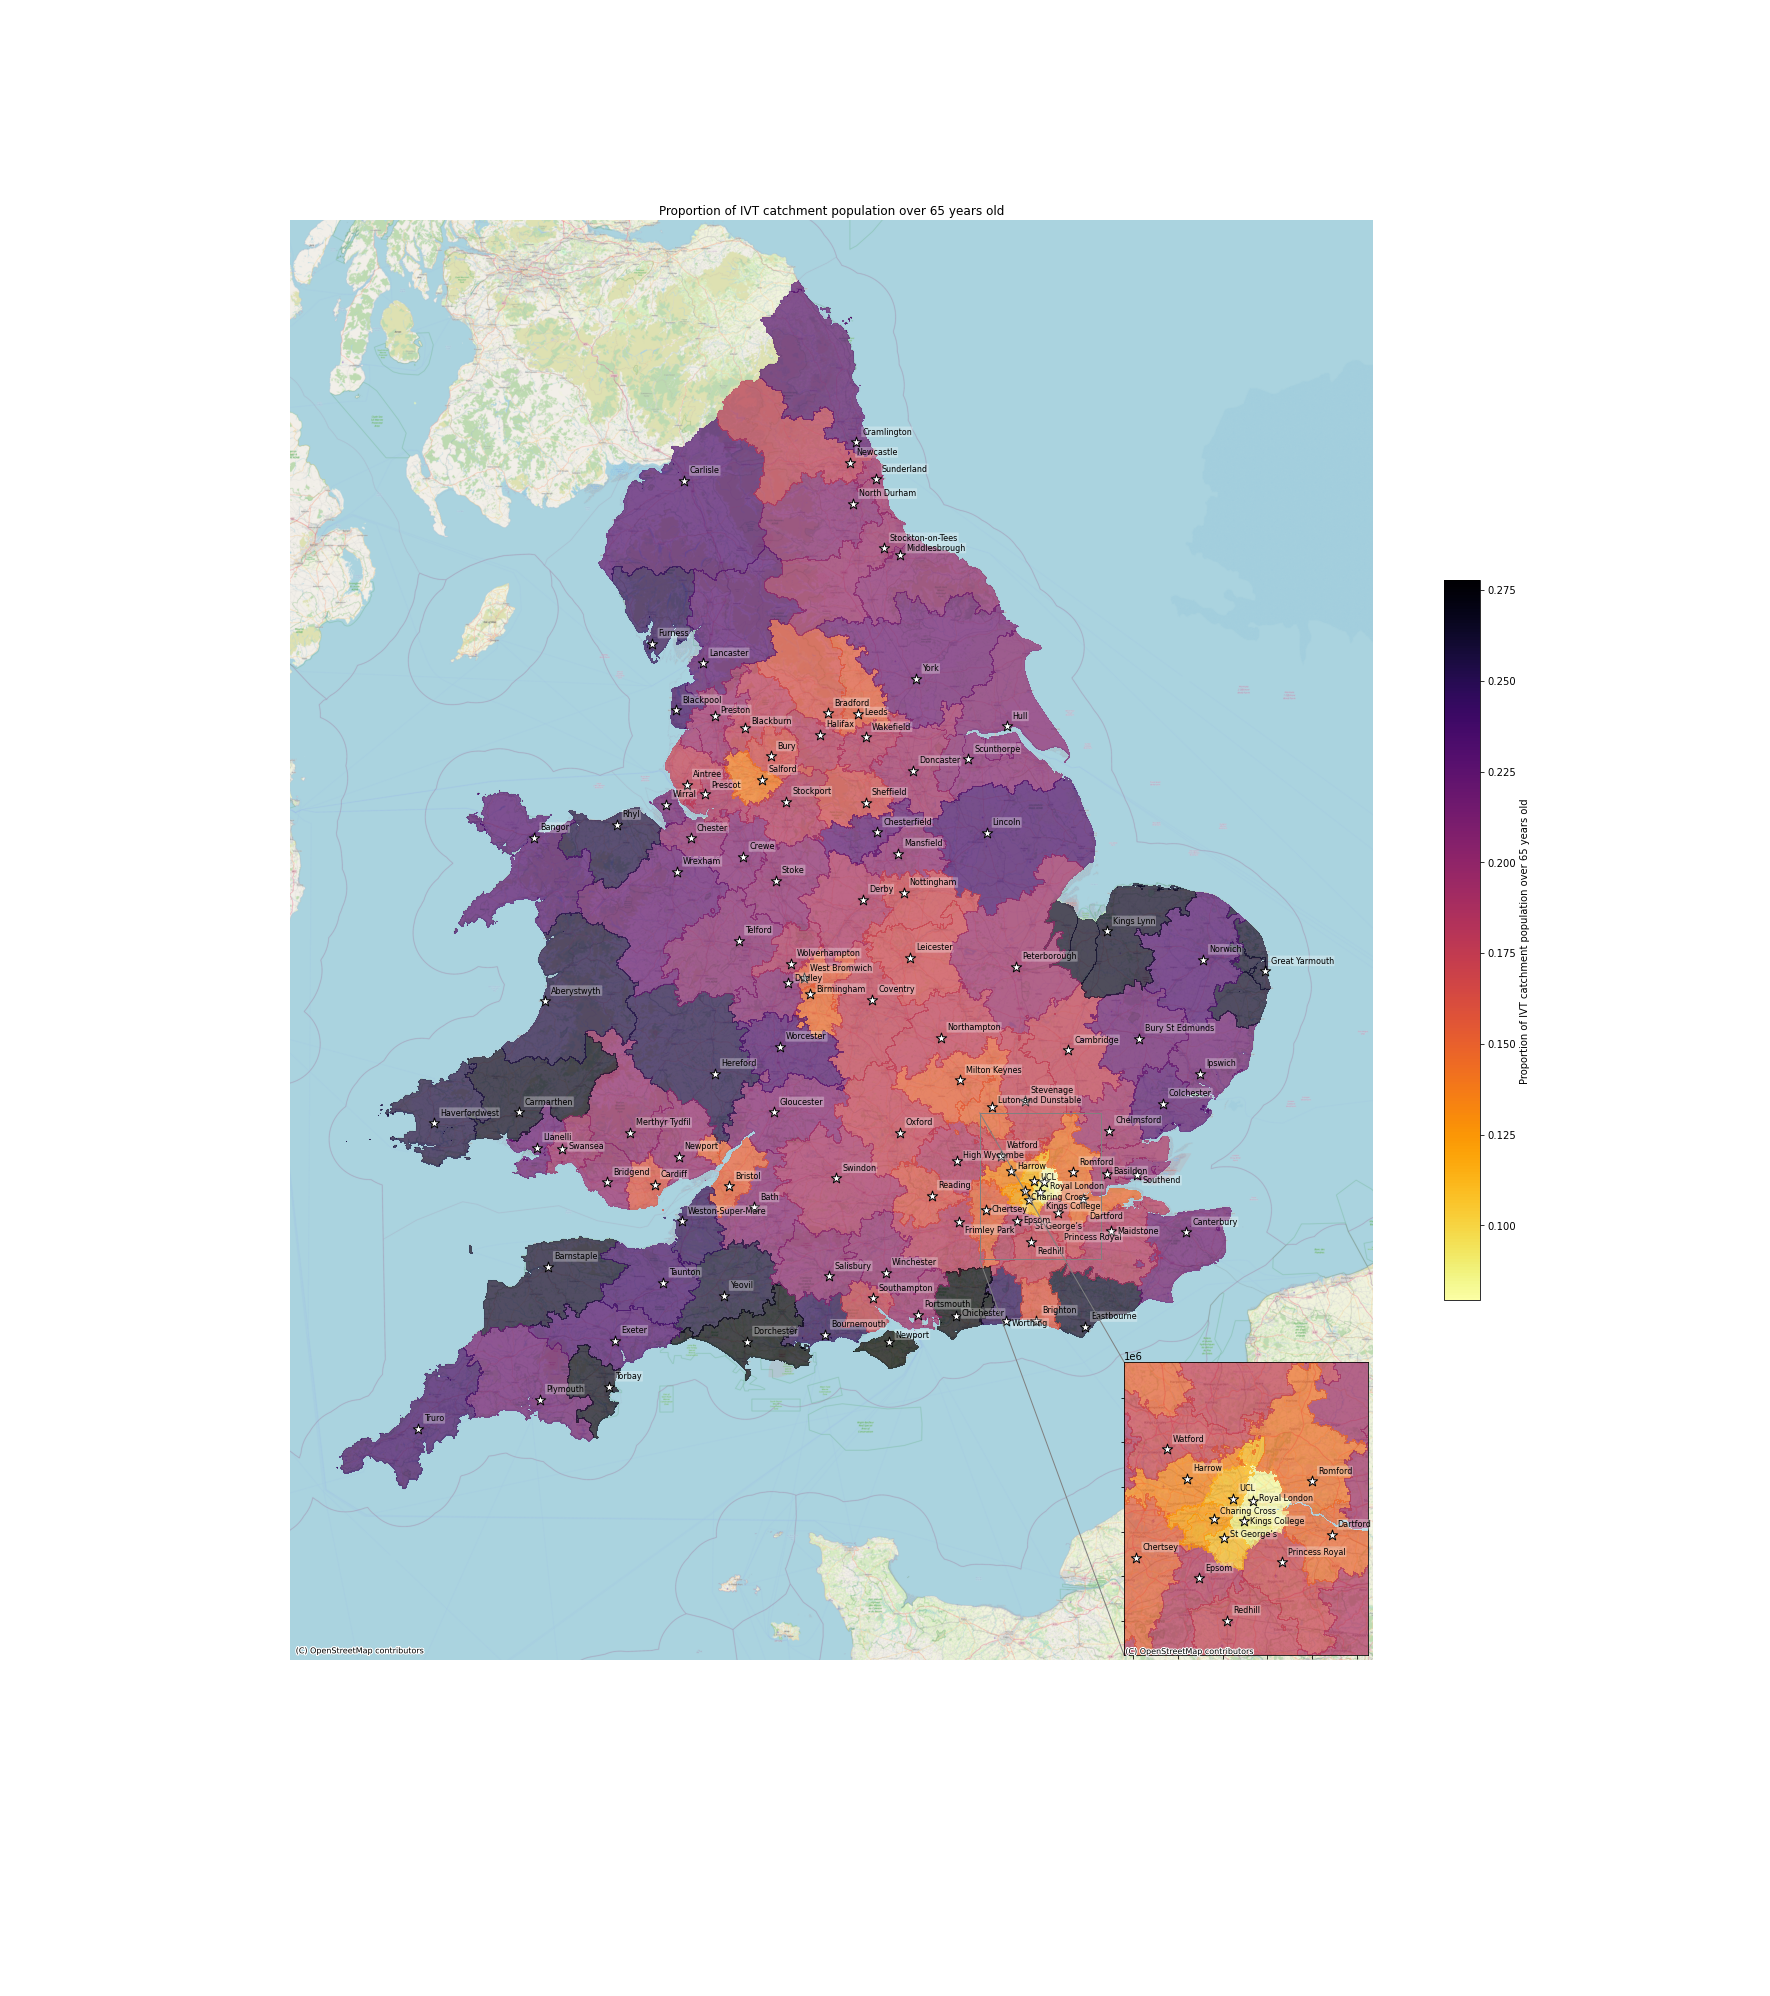

In [12]:
show_labels = True

col = 'proportion over 65'
col_readable = 'Proportion of IVT catchment population over 65 years old'

fig, ax = plt.subplots(figsize=(20, 20)) # Make max dimensions 10x10 inch
gdf_ivt_catchment.plot(ax=ax, # Set which axes to use for plot (only one here)
                 column=col, # Column to apply colour
                 antialiased=False, # Avoids artifact boundry lines
                 edgecolor='face', # Make LSOA boundry same colour as area
                 linewidth=0.0,# Use linewidth=0 to hide boarder lines
#                 vmin=0, # Manual scale min (remove to make automatic)
#                 vmax=70, # Manual scale max (remove to make automatic)
                 cmap='inferno_r', # Colour map to use
                 # Adjust size of colourmap key, and add label
                 legend_kwds={'shrink':0.5, 'label':f'{col_readable}'},
                 # Set to display legend
                 legend=True,
                 # Set transparancy (to help reveal basemap
                 alpha = 0.70)

# Plot location of hospitals
gdf_units.plot(ax=ax, edgecolor='k', facecolor='w', markersize=120, 
               marker='*')

if show_labels:
    ax = add_nonoverlapping_text_labels(gdf_units, ax, 'hospital_city',
                                        y_step=0.05, fontsize=8)

        
# Add base map (note that we specifiy the same CRS as we are using)
# Use manual zoom to adjust level of detail of base map
ctx.add_basemap(ax, 
                source=ctx.providers.OpenStreetMap.Mapnik,zoom=10)


# give some more space at bottom for london inset map
ax.set_ylim(ax.get_ylim()[0] - 100000, ax.get_ylim()[1])
# give some more space at right for hospital name label
ax.set_xlim(ax.get_xlim()[0], ax.get_xlim()[1] + 50000)

# Add base map (note that we specifiy the same CRS as we are using)
# Use manual zoom to adjust level of detail of base map
ctx.add_basemap(ax, 
                source=ctx.providers.OpenStreetMap.Mapnik,zoom=10)

# Insert an inset map (loc=4 places it bottom right)
axins = zoomed_inset_axes(ax, 2, loc=4)

# Identify london hospitals to go in the inset map
mask = gdf_units["Strategic Clinical Network"]=="London SCN"
london_hospitals = gdf_units["Hospital_name"][mask].to_list()

# identify map area to plot in the inset map
# initialise exteme values
minx_ = np.inf
miny_ = np.inf
maxx_ = 0
maxy_ = 0
# Find min and max x and y for the london hospitals
for h in london_hospitals:
    minx,miny,maxx,maxy =  eng_wales_bounds.loc[h]
    minx_ = min(minx_, minx)
    miny_ = min(miny_, miny)
    maxx_ = max(maxx_, maxx)
    maxy_ = max(maxy_, maxy)

# Set extent of inset map
axins.set_xlim(minx_, maxx_)
axins.set_ylim(miny_, maxy_)

# Define lines connecting inset map to main map
mark_inset(ax, axins, loc1=2, loc2=3, fc="none", ec="0.5")

# Plot zoom window
gdf_ivt_catchment.plot(ax=axins, # Set which axes to use for plot (only one here)
                 column=col, # Column to apply colour
                 antialiased=False, # Avoids artifact boundry lines
                 edgecolor='face', # Make LSOA boundry same colour as area
                 linewidth=0.0,# Use linewidth=0 to hide boarder lines
                 cmap='inferno_r', # Colour map to use
                 # Adjust size of colourmap key, and add label
#                 legend_kwds={'shrink':0.5, 'label':f'{col_readable}'},
                 # Set to display legend
#                 legend=True,
                 # Set transparancy (to help reveal basemap
                 alpha = 0.70)

# Plot location of hospitals
gdf_units.plot(ax=axins, edgecolor='k', facecolor='w', markersize=120, 
               marker='*')

# Label hospitals
if show_labels:
    axins = add_nonoverlapping_text_labels(gdf_units, axins, 'hospital_city',
                                        y_step=0.05, fontsize=8)

# Add base map (note that we specifiy the same CRS as we are using)
# Use manual zoom to adjust level of detail of base map
ctx.add_basemap(ax=axins, 
                source=ctx.providers.OpenStreetMap.Mapnik,zoom=10)

# Remove x and y ticks
plt.setp(axins.get_xticklabels(), visible=False)
plt.setp(axins.get_yticklabels(), visible=False)
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)

ax.set_axis_off() # Turn of axis line and numbers
ax.set_title(f'{col_readable}')
# Adjust for printing
ax.margins(0)
ax.apply_aspect()
plt.subplots_adjust(left=0.01, right=1.0, bottom=0.0, top=1.0)
plt.savefig(f'map_{col}.jpg', dpi=300, bbox_inches='tight', pad_inches=0.2) # Save figure
plt.show()

In [13]:
print(f"The range of {col_readable} across the {gdf_ivt_catchment.shape[0]} catchments is: {round(gdf_ivt_catchment[col].min(),2)} to {round(gdf_ivt_catchment[col].max(),2)}")
print(f"Median: {round(gdf_ivt_catchment[col].median(),2)}")

The range of Proportion of IVT catchment population over 65 years old across the 113 catchments is: 0.08 to 0.28
Median: 0.2


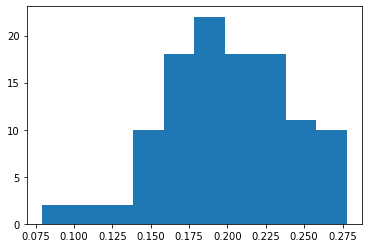

In [14]:
plt.hist(gdf_ivt_catchment[col]);

### Relationship between Proportion over 65 years old and stroke admissions
Verify assumption that patients visit closest hosptial to home LSOA

In [15]:
ivt_catchment_ages.head()

All persons  age band 65  age band 70  age band 75  \
closest_ivt_unit                                                       
B152TH               959513.0      39508.0      35919.0      26134.0   
B714HJ              1008460.0      43093.0      40044.0      30131.0   
BA13NG               477413.0      26781.0      26934.0      18086.0   
BA214AT              272334.0      18983.0      19019.0      13151.0   
BB23HH               481355.0      25425.0      23924.0      15503.0   

                  age band 80  age band 85  age band 90  age band 95  \
closest_ivt_unit                                                       
B152TH                20464.0      13070.0       7474.0          0.0   
B714HJ                22703.0      14049.0       7607.0          0.0   
BA13NG                13762.0       8546.0       5146.0          0.0   
BA214AT                9361.0       6031.0       3794.0          0.0   
BB23HH                11196.0       6537.0       3604.0          0.0   

                  age band over 65  proportion over 65  
closest_ivt_unit                                        
B152TH                    142569.0            0.148585  
B714HJ                    157627.0            0.156305  
BA13NG                     99255.0            0.207902  
BA214AT                    70339.0            0.258282  
BB23HH                     86189.0            0.179055

In [16]:
#ivt_catchment_ages.set_index([]"Postcode"], inplace=True)
gdf_units.set_index(["Postcode"], inplace=True)
gdf_units.head()

Hospital_name Use_IVT Use_MT  Country Strategic Clinical Network  \
Postcode                                                                    
NE236NZ        NE236NZ       1      0  England       North of England SCN   
NE14LP          NE14LP       1      1  England       North of England SCN   
SR47TP          SR47TP       1      0  England       North of England SCN   
CA27HY          CA27HY       1      0  England       North of England SCN   
DH15TW          DH15TW       1      0  England       North of England SCN   

                                       Health Board / Trust  \
Postcode                                                      
NE236NZ         Northumbria Healthcare NHS Foundation Trust   
NE14LP    Newcastle upon Tyne Hospitals NHS Foundation T...   
SR47TP       City Hospitals Sunderland NHS Foundation Trust   
CA27HY         North Cumbria University Hospitals NHS Trust   
DH15TW    County Durham and Darlington NHS Foundation Trust   

                                                Stroke Team  \
Postcode                                                      
NE236NZ   Northumbria Specialist Emergency Care Hospital...   
NE14LP                  Royal Victoria Infirmary, Newcastle   
SR47TP                            Sunderland Royal Hospital   
CA27HY                       Cumberland Infirmary, Carlisle   
DH15TW                  University Hospital of North Durham   

                                                 SSNAP name Admissions 21/22  \
Postcode                                                                       
NE236NZ   Northumbria Specialist Emergency Care Hospital...             1101   
NE14LP                             Royal Victoria Infirmary             1096   
SR47TP                            Sunderland Royal Hospital              711   
CA27HY                                 Cumberland Infirmary              485   
DH15TW                  University Hospital of North Durham              961   

         Thrombolysis ivt_rate Easting Northing Neuroscience  \
Postcode                                                       
NE236NZ           140     12.7  427587   575599            0   
NE14LP            134     12.2  424489   565063            1   
SR47TP             81     11.4  437866   556641            0   
CA27HY             63       13  338830   556086            0   
DH15TW             94      9.8  426217   543809            0   

         30 England Thrombectomy Example hospital_city Notes  \
Postcode                                                       
NE236NZ                                0   Cramlington         
NE14LP                                 1     Newcastle         
SR47TP                                 0    Sunderland         
CA27HY                                 0      Carlisle         
DH15TW                                 0  North Durham         

                                 geometry  
Postcode                                   
NE236NZ   POINT (-174715.077 7376258.603)  
NE14LP    POINT (-180216.001 7357903.099)  
SR47TP    POINT (-157073.822 7343075.356)  
CA27HY    POINT (-328981.918 7341658.519)  
DH15TW    POINT (-177424.804 7320925.458)

In [17]:
df_plot = ivt_catchment_ages.join(gdf_units['Admissions 21/22']).reset_index()
df_plot = df_plot[['age band over 65', 'Admissions 21/22']]
df_plot.head()

age band over 65 Admissions 21/22
0          142569.0             1138
1          157627.0              741
2           99255.0              654
3           70339.0              414
4           86189.0              765

In [18]:
x_comparision = np.array(df_plot['Admissions 21/22']).reshape(-1, 1).astype(float)
y_comparision = np.array(df_plot['age band over 65']).reshape(-1, 1).astype(float)

slr = LinearRegression()
slr.fit(x_comparision, y_comparision)
y_pred = slr.predict(x_comparision)
r_square = metrics.r2_score(y_comparision, y_pred)

print(f'R squared {r_square:0.3f}')

R squared 0.543


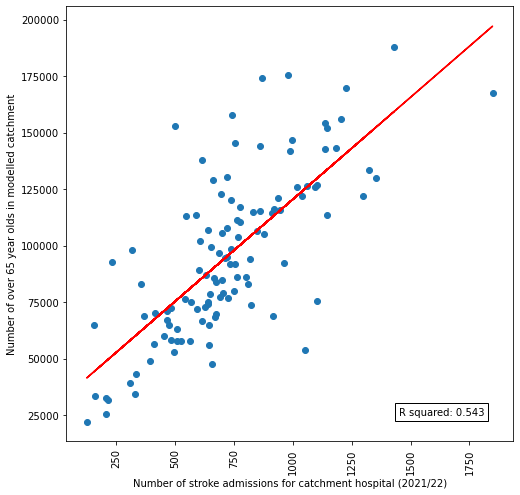

In [19]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(111)
ax1.scatter(x_comparision,
            y_comparision)

plt.plot (x_comparision, y_pred, color = 'red')
text = f'R squared: {r_square:.3f}'
ax1.text(1450,25000, text, 
         bbox=dict(facecolor='white', edgecolor='black'))
ax1.set_xlabel('Number of stroke admissions for catchment hospital (2021/22)')
#ax1.set_xticklabels(rotation=90)
plt.xticks(rotation = 90) 
ax1.set_ylabel('Number of over 65 year olds in modelled catchment')
#plt.grid()
plt.savefig(f'plot_admission_popn.jpg', 
            dpi=300, bbox_inches='tight', pad_inches=0.2)
plt.show()


In [20]:
### Map of IVT rates

In [21]:
gdf_ivt_catchment.set_index(['closest_iv'], inplace=True)
gdf_ivt_catchment = gdf_ivt_catchment.join(gdf_units['ivt_rate'].astype(float)).reset_index()
gdf_ivt_catchment.head()

closest_iv                           LSOA11NM   LSOA11CD  \
0     B152TH                    Birmingham 067A  E01008881   
1     B714HJ                    Birmingham 037A  E01008899   
2     BA13NG  Bath and North East Somerset 007A  E01014370   
3    BA214AT                    East Devon 005A  E01019886   
4     BB23HH                        Bolton 001B  E01004803   

                           LSOA11NMW  \
0                    Birmingham 067A   
1                    Birmingham 037A   
2  Bath and North East Somerset 007A   
3                    East Devon 005A   
4                        Bolton 001B   

                                            geometry  All persons  \
0  MULTIPOLYGON (((-196108.670 6856006.932, -1963...     959513.0   
1  MULTIPOLYGON (((-229576.464 6863444.064, -2294...    1008460.0   
2  POLYGON ((-237096.214 6662581.601, -236920.941...     477413.0   
3  MULTIPOLYGON (((-332442.946 6582944.980, -3327...     272334.0   
4  POLYGON ((-270459.822 7099547.703, -270828.685...     481355.0   

   proportion over 65  ivt_rate  
0            0.148585       8.9  
1            0.156305       6.7  
2            0.207902       7.5  
3            0.258282      10.9  
4            0.179055      10.8

In [22]:
print(f"{gdf_ivt_catchment['ivt_rate'].min()} to {gdf_ivt_catchment['ivt_rate'].max()}")

1.9 to 27.5


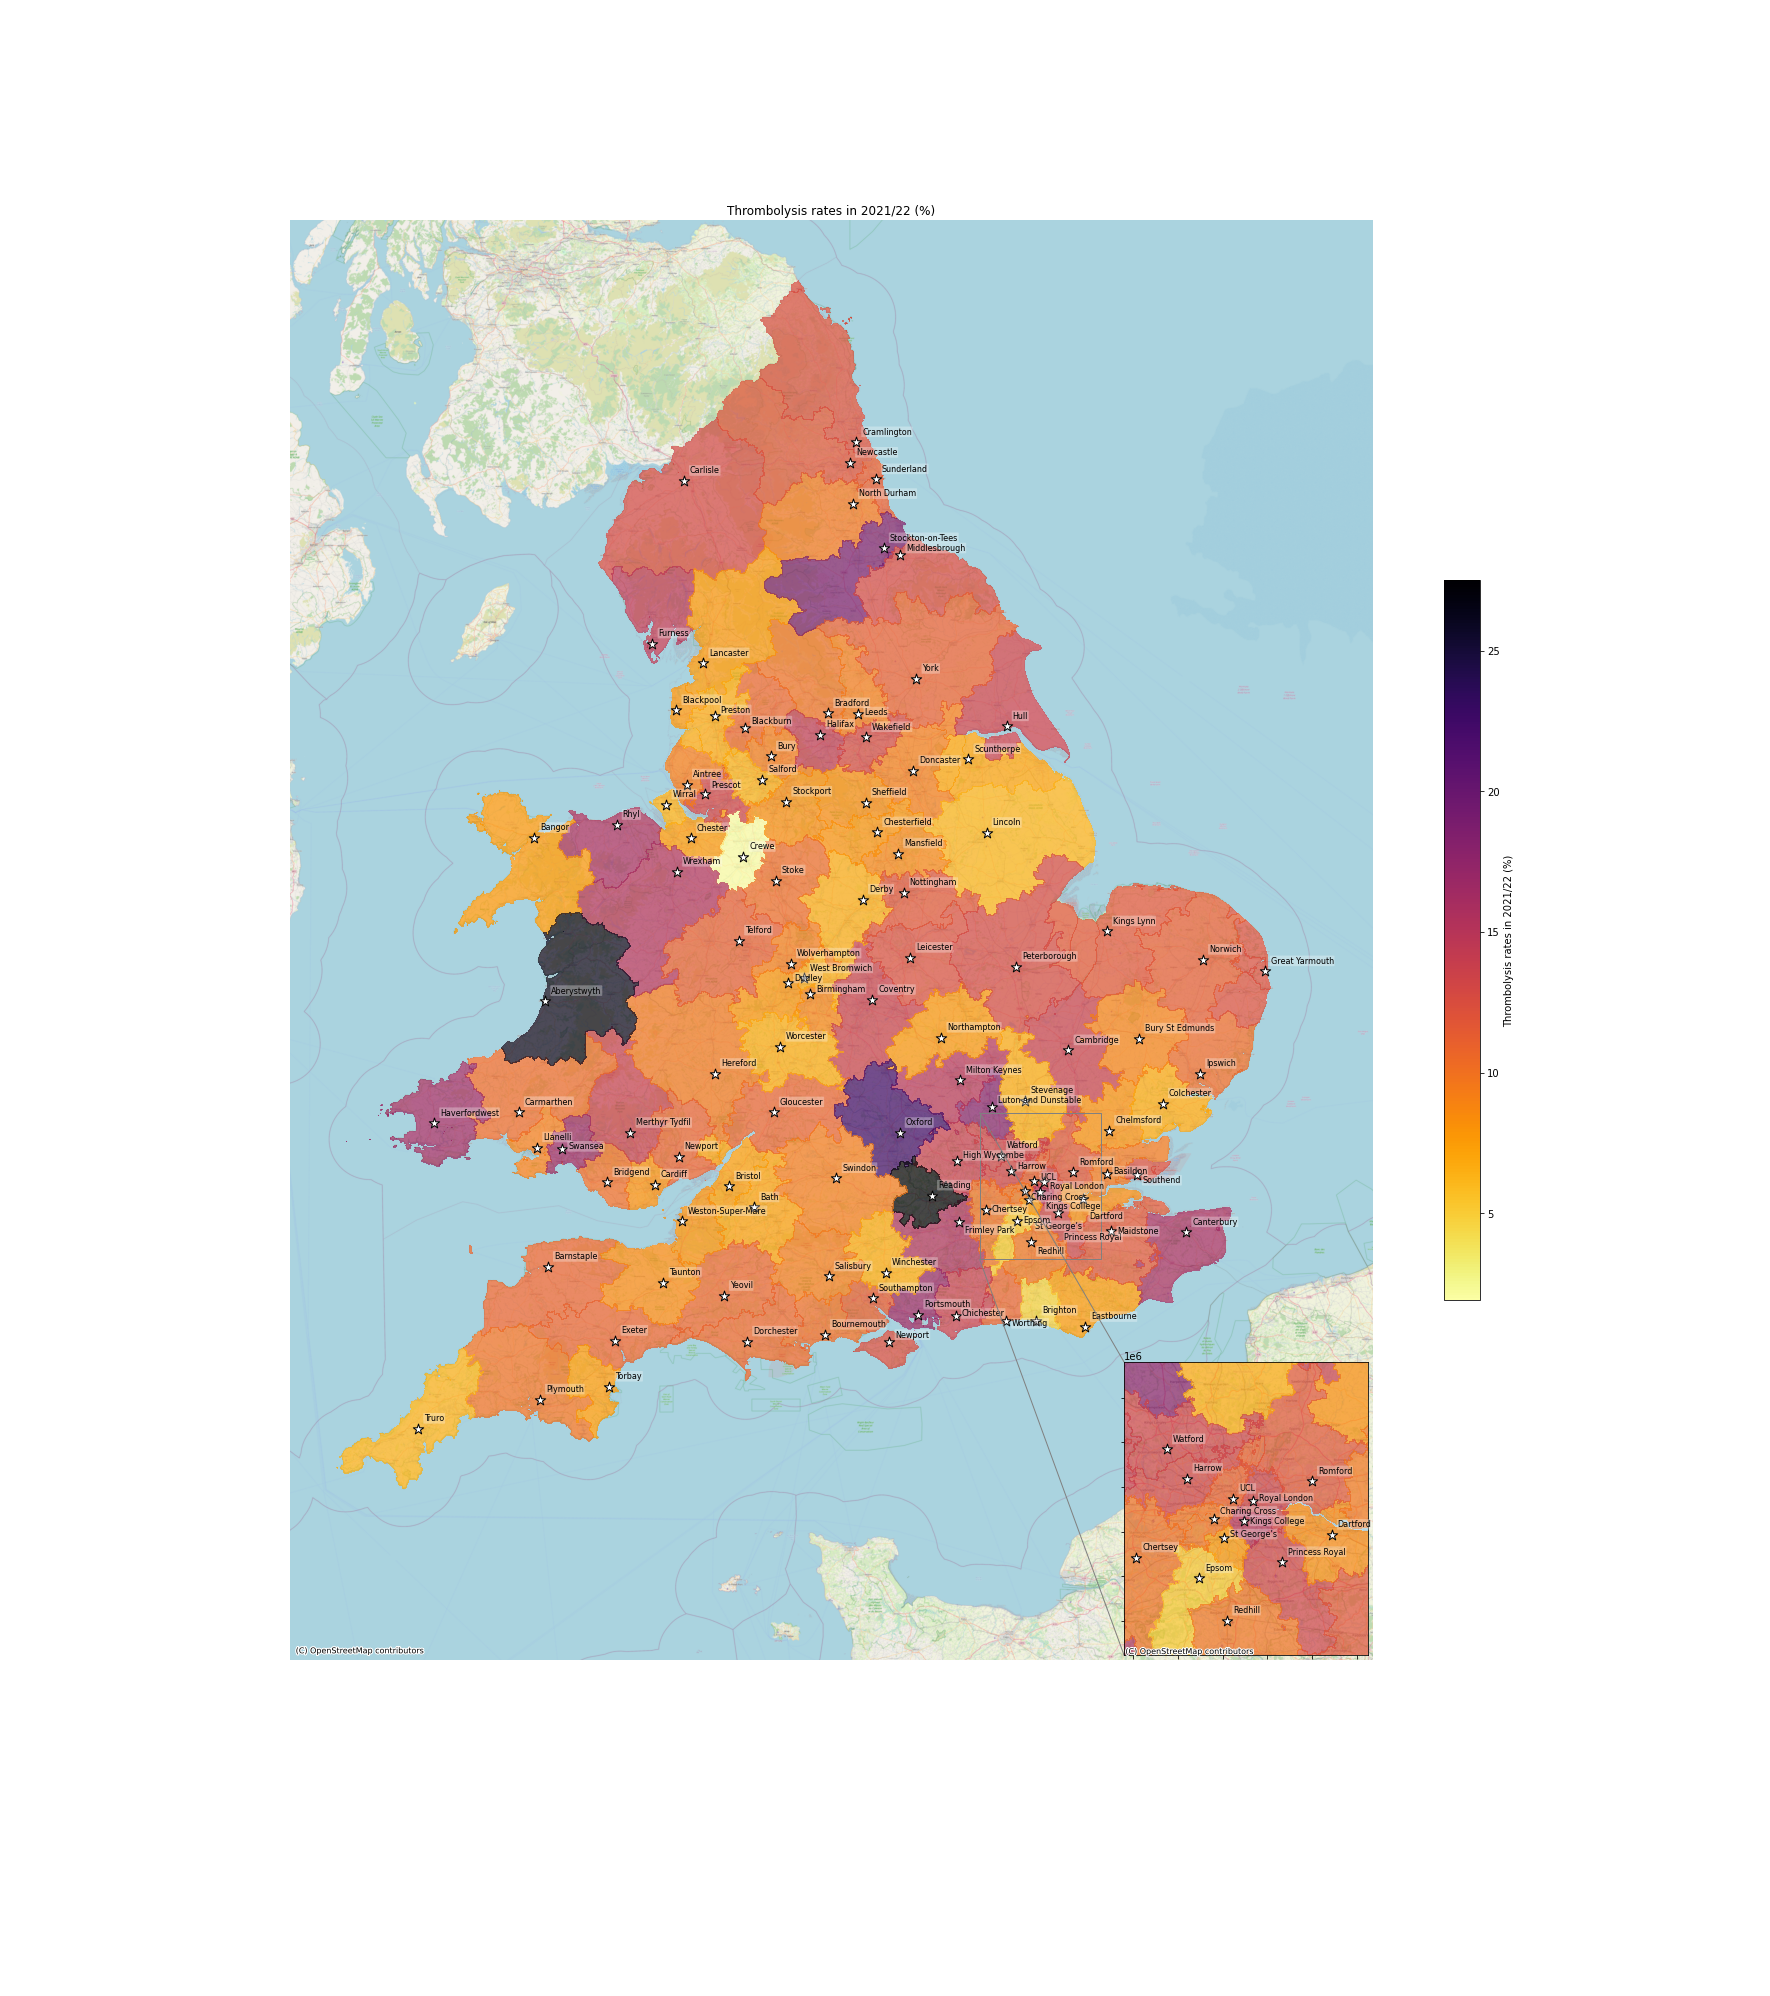

In [23]:
show_labels = True

col = 'ivt_rate'
col_readable = 'Thrombolysis rates in 2021/22 (%)'

fig, ax = plt.subplots(figsize=(20, 20)) # Make max dimensions 10x10 inch
gdf_ivt_catchment.plot(ax=ax, # Set which axes to use for plot (only one here)
                 column=col, # Column to apply colour
                 antialiased=False, # Avoids artifact boundry lines
                 edgecolor='face', # Make LSOA boundry same colour as area
                 linewidth=0.0,# Use linewidth=0 to hide boarder lines
#                 vmin=0, # Manual scale min (remove to make automatic)
#                 vmax=70, # Manual scale max (remove to make automatic)
                 cmap='inferno_r', # Colour map to use
                 # Adjust size of colourmap key, and add label
                  legend_kwds={'shrink':0.5, 'label':f'{col_readable}'},
                 # Set to display legend
                 legend=True,
                 # Set transparancy (to help reveal basemap
                 alpha = 0.70)

# Plot location of hospitals
gdf_units.plot(ax=ax, edgecolor='k', facecolor='w', markersize=120, 
               marker='*')

if show_labels:
    ax = add_nonoverlapping_text_labels(gdf_units, ax, 'hospital_city',
                                        y_step=0.05, fontsize=8)

        
# Add base map (note that we specifiy the same CRS as we are using)
# Use manual zoom to adjust level of detail of base map
ctx.add_basemap(ax, 
                source=ctx.providers.OpenStreetMap.Mapnik,zoom=10)


# give some more space at bottom for london inset map
ax.set_ylim(ax.get_ylim()[0] - 100000, ax.get_ylim()[1])
# give some more space at right for hospital name label
ax.set_xlim(ax.get_xlim()[0], ax.get_xlim()[1] + 50000)

# Add base map (note that we specifiy the same CRS as we are using)
# Use manual zoom to adjust level of detail of base map
ctx.add_basemap(ax, 
                source=ctx.providers.OpenStreetMap.Mapnik,zoom=10)

# Insert an inset map (loc=4 places it bottom right)
axins = zoomed_inset_axes(ax, 2, loc=4)

# Identify london hospitals to go in the inset map
mask = gdf_units["Strategic Clinical Network"]=="London SCN"
london_hospitals = gdf_units["Hospital_name"][mask].to_list()

# identify map area to plot in the inset map
# initialise exteme values
minx_ = np.inf
miny_ = np.inf
maxx_ = 0
maxy_ = 0
# Find min and max x and y for the london hospitals
for h in london_hospitals:
    minx,miny,maxx,maxy =  eng_wales_bounds.loc[h]
    minx_ = min(minx_, minx)
    miny_ = min(miny_, miny)
    maxx_ = max(maxx_, maxx)
    maxy_ = max(maxy_, maxy)

# Set extent of inset map
axins.set_xlim(minx_, maxx_)
axins.set_ylim(miny_, maxy_)

# Define lines connecting inset map to main map
mark_inset(ax, axins, loc1=2, loc2=3, fc="none", ec="0.5")

# Plot zoom window
gdf_ivt_catchment.plot(ax=axins, # Set which axes to use for plot (only one here)
                 column=col, # Column to apply colour
                 antialiased=False, # Avoids artifact boundry lines
                 edgecolor='face', # Make LSOA boundry same colour as area
                 linewidth=0.0,# Use linewidth=0 to hide boarder lines
                 cmap='inferno_r', # Colour map to use
                 # Adjust size of colourmap key, and add label
#                 legend_kwds={'shrink':0.5, 'label':f'{col_readable}'},
                 # Set to display legend
#                 legend=True,
                 # Set transparancy (to help reveal basemap
                 alpha = 0.70)

# Plot location of hospitals
gdf_units.plot(ax=axins, edgecolor='k', facecolor='w', markersize=120, 
               marker='*')

# Label hospitals
if show_labels:
    axins = add_nonoverlapping_text_labels(gdf_units, axins, 'hospital_city',
                                        y_step=0.05, fontsize=8)

# Add base map (note that we specifiy the same CRS as we are using)
# Use manual zoom to adjust level of detail of base map
ctx.add_basemap(ax=axins, 
                source=ctx.providers.OpenStreetMap.Mapnik,zoom=10)

# Remove x and y ticks
plt.setp(axins.get_xticklabels(), visible=False)
plt.setp(axins.get_yticklabels(), visible=False)
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)

ax.set_axis_off() # Turn of axis line and numbers
ax.set_title(f'{col_readable}')
# Adjust for printing
ax.margins(0)
ax.apply_aspect()
plt.subplots_adjust(left=0.01, right=1.0, bottom=0.0, top=1.0)
plt.savefig(f'map_{col}.jpg', dpi=300, bbox_inches='tight', pad_inches=0.2) # Save figure
plt.show()

In [24]:
shapefile_copy = gdf_ivt_catchment.copy()
shapefile_copy = shapefile_copy.to_crs({'init': 'epsg:3857'})
shapefile_copy["area"] = shapefile_copy.area / 10**6
gdf_ivt_catchment["area"] = shapefile_copy["area"]
gdf_ivt_catchment["population_density"] = gdf_ivt_catchment["All persons"]/gdf_ivt_catchment["area"]

/home/kerry/anaconda3/envs/geopandas/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [25]:
print (f'{gdf_ivt_catchment["population_density"].min()} to {gdf_ivt_catchment["population_density"].max()}')       

9.45079174082748 to 3994.950800256962


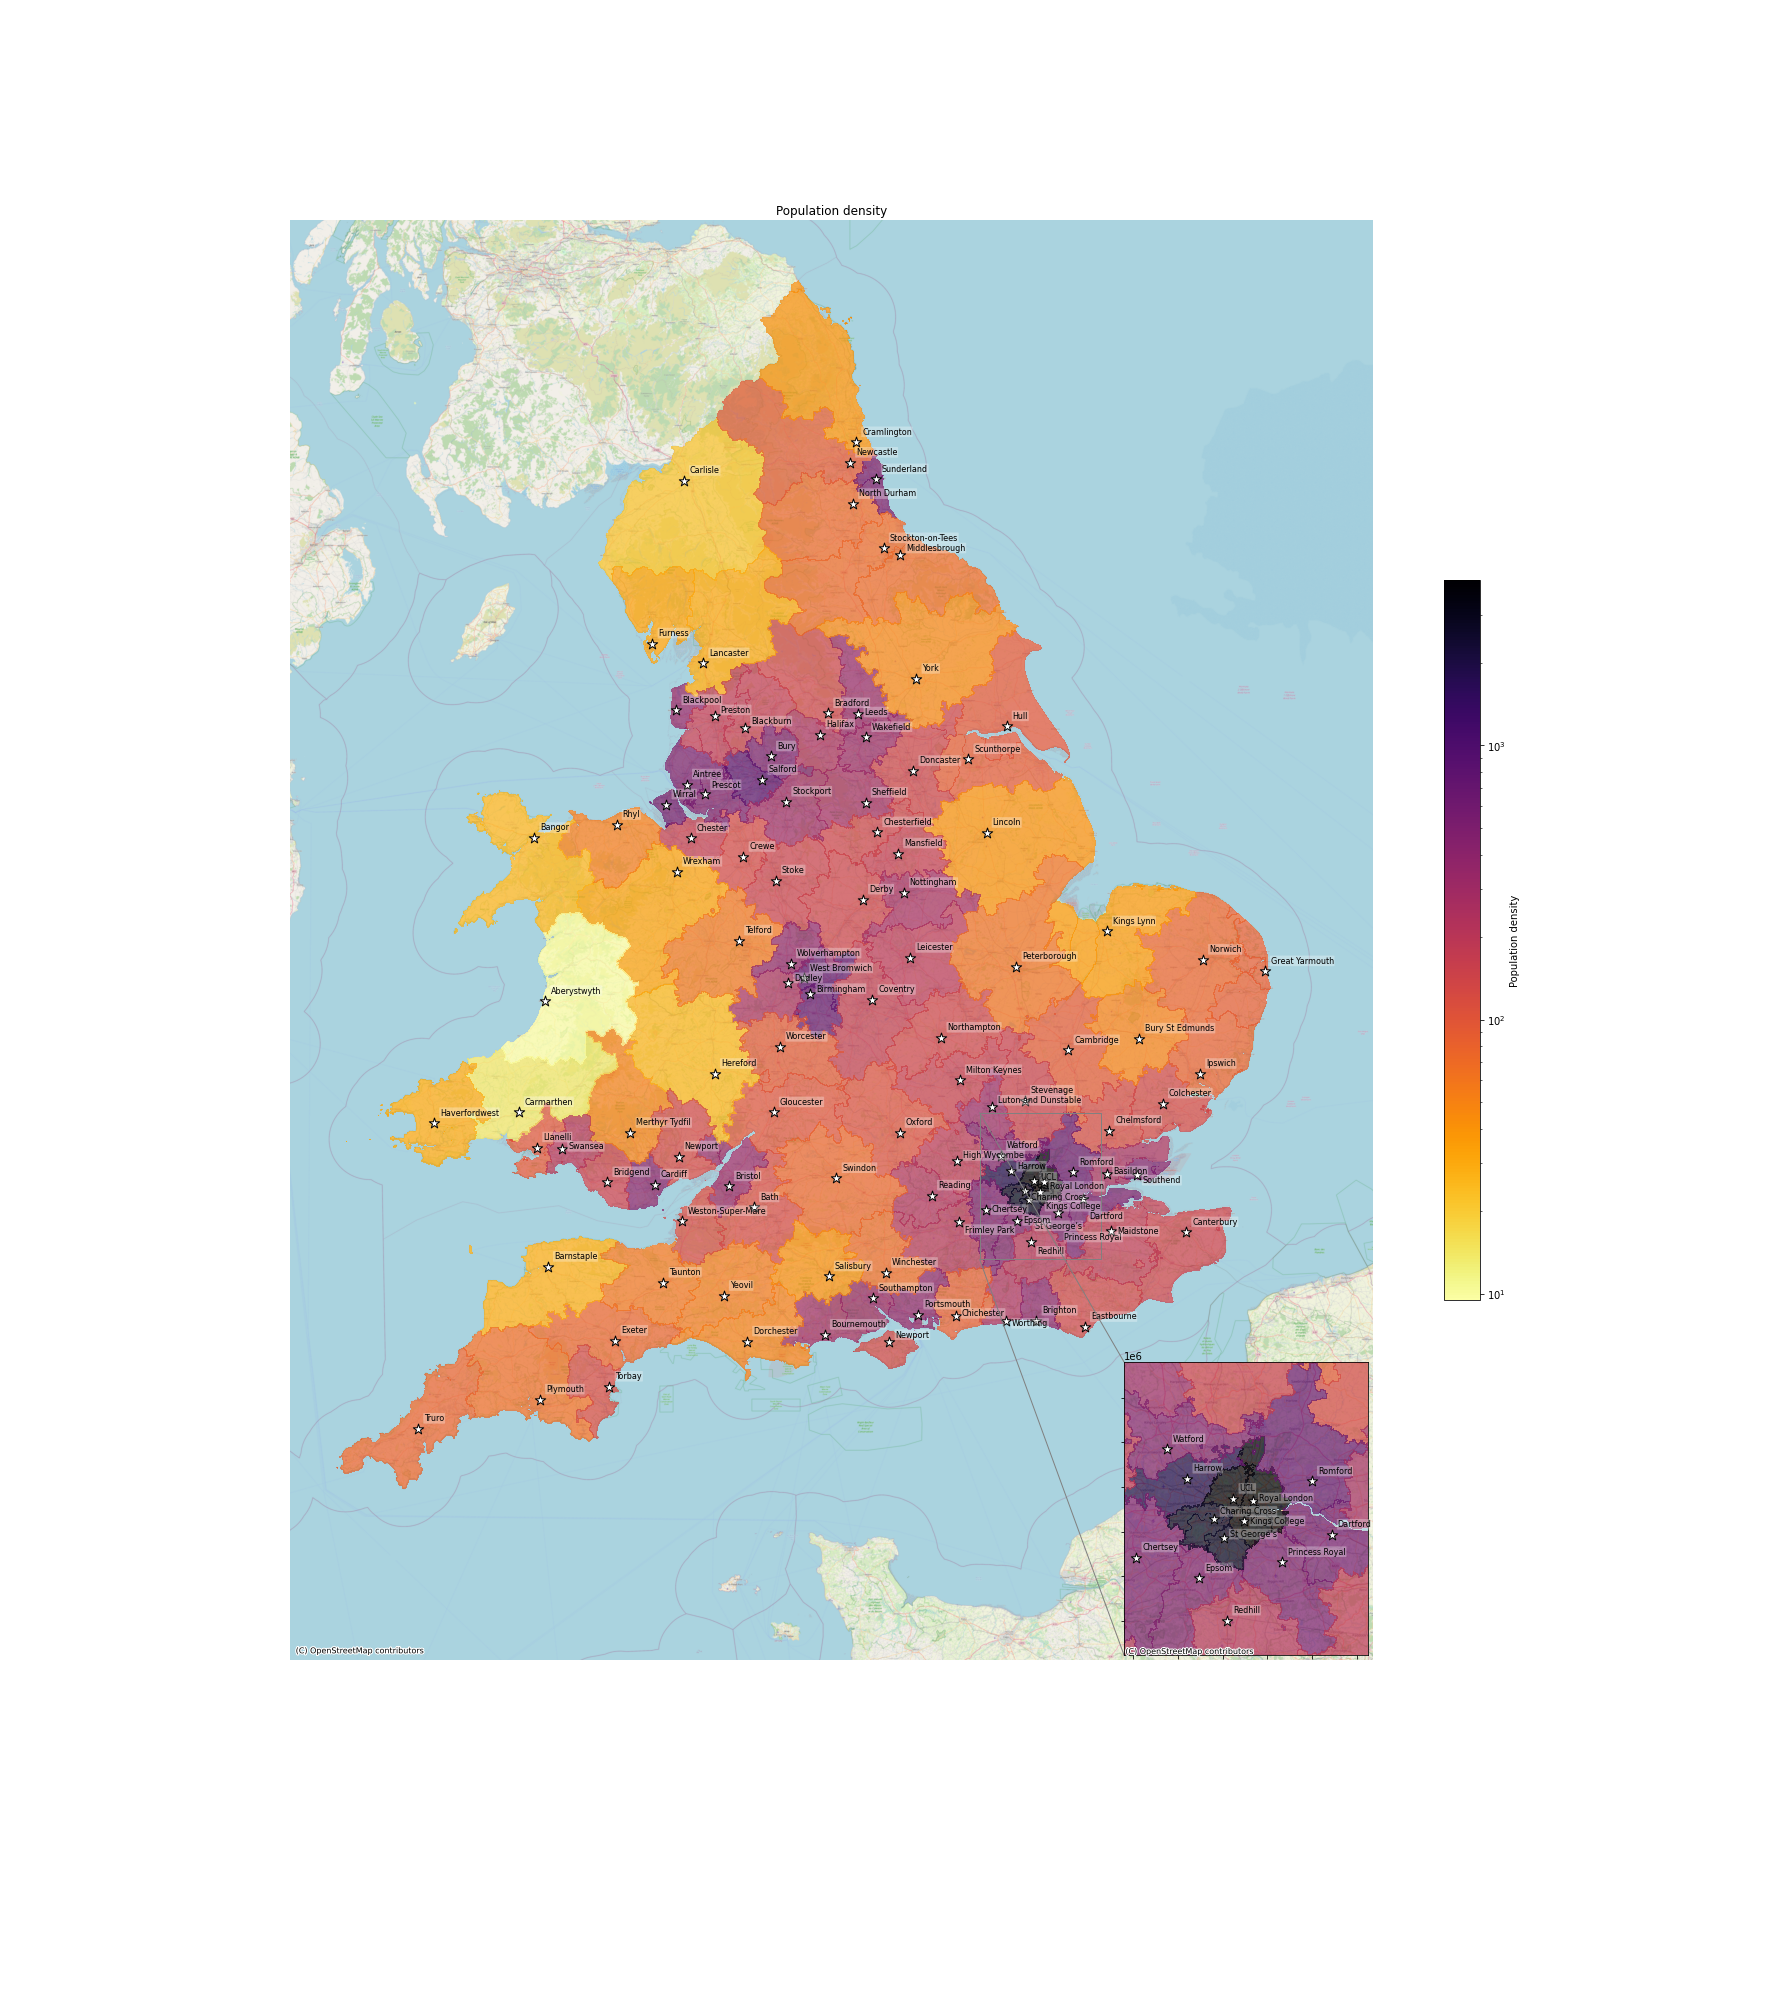

In [26]:
show_labels = True

col = 'population_density'
col_readable = 'Population density'

fig, ax = plt.subplots(figsize=(20, 20)) # Make max dimensions 10x10 inch
gdf_ivt_catchment.plot(ax=ax, # Set which axes to use for plot (only one here)
                 column=col, # Column to apply colour
                 norm=colors.LogNorm(vmin=gdf_ivt_catchment[col].min(), vmax=gdf_ivt_catchment[col].max()),
                 antialiased=False, # Avoids artifact boundry lines
                 edgecolor='face', # Make LSOA boundry same colour as area
                 linewidth=0.0,# Use linewidth=0 to hide boarder lines
#                 vmin=0, # Manual scale min (remove to make automatic)
#                 vmax=70, # Manual scale max (remove to make automatic)
                 cmap='inferno_r', # Colour map to use
                 # Adjust size of colourmap key, and add label
                 legend_kwds={'shrink':0.5, 'label':f'{col_readable}'},
                 # Set to display legend
                 legend=True,
                 # Set transparancy (to help reveal basemap
                 alpha = 0.70)

# Plot location of hospitals
gdf_units.plot(ax=ax, edgecolor='k', facecolor='w', markersize=120, 
               marker='*')


if show_labels:
    ax = add_nonoverlapping_text_labels(gdf_units, ax, 'hospital_city',
                                        y_step=0.05, fontsize=8)
        
# Add base map (note that we specifiy the same CRS as we are using)
# Use manual zoom to adjust level of detail of base map
ctx.add_basemap(ax, 
                source=ctx.providers.OpenStreetMap.Mapnik,zoom=10)



# give some more space at bottom for london inset map
ax.set_ylim(ax.get_ylim()[0] - 100000, ax.get_ylim()[1])
# give some more space at right for hospital name label
ax.set_xlim(ax.get_xlim()[0], ax.get_xlim()[1] + 50000)

# Add base map (note that we specifiy the same CRS as we are using)
# Use manual zoom to adjust level of detail of base map
ctx.add_basemap(ax, 
                source=ctx.providers.OpenStreetMap.Mapnik,zoom=10)

# Insert an inset map (loc=4 places it bottom right)
axins = zoomed_inset_axes(ax, 2, loc=4)

# Identify london hospitals to go in the inset map
mask = gdf_units["Strategic Clinical Network"]=="London SCN"
london_hospitals = gdf_units["Hospital_name"][mask].to_list()

# identify map area to plot in the inset map
# initialise exteme values
minx_ = np.inf
miny_ = np.inf
maxx_ = 0
maxy_ = 0
# Find min and max x and y for the london hospitals
for h in london_hospitals:
    minx,miny,maxx,maxy =  eng_wales_bounds.loc[h]
    minx_ = min(minx_, minx)
    miny_ = min(miny_, miny)
    maxx_ = max(maxx_, maxx)
    maxy_ = max(maxy_, maxy)

# Set extent of inset map
axins.set_xlim(minx_, maxx_)
axins.set_ylim(miny_, maxy_)

# Define lines connecting inset map to main map
mark_inset(ax, axins, loc1=2, loc2=3, fc="none", ec="0.5")

# Plot zoom window
gdf_ivt_catchment.plot(ax=axins, # Set which axes to use for plot (only one here)
                 column=col, # Column to apply colour
                norm=colors.LogNorm(vmin=gdf_ivt_catchment[col].min(), vmax=gdf_ivt_catchment[col].max()),
                 antialiased=False, # Avoids artifact boundry lines
                 edgecolor='face', # Make LSOA boundry same colour as area
                 linewidth=0.0,# Use linewidth=0 to hide boarder lines
#                 vmin=0, # Manual scale min (remove to make automatic)
#                 vmax=70, # Manual scale max (remove to make automatic)
                 cmap='inferno_r', # Colour map to use
                 # Adjust size of colourmap key, and add label
#                 legend_kwds={'shrink':0.5, 'label':f'{col_readable}'},
                 # Set to display legend
#                 legend=True,
                 # Set transparancy (to help reveal basemap
                 alpha = 0.70)



# Plot location of hospitals
gdf_units.plot(ax=axins, edgecolor='k', facecolor='w', markersize=120, 
               marker='*')

# Label hospitals
if show_labels:
    axins = add_nonoverlapping_text_labels(gdf_units, axins, 'hospital_city',
                                        y_step=0.05, fontsize=8)
    
# Add base map (note that we specifiy the same CRS as we are using)
# Use manual zoom to adjust level of detail of base map
ctx.add_basemap(ax=axins, 
                source=ctx.providers.OpenStreetMap.Mapnik,zoom=10)

# Remove x and y ticks
plt.setp(axins.get_xticklabels(), visible=False)
plt.setp(axins.get_yticklabels(), visible=False)
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)

ax.set_axis_off() # Turn of axis line and numbers
ax.set_title(f'{col_readable}')
# Adjust for printing
ax.margins(0)
ax.apply_aspect()
plt.subplots_adjust(left=0.01, right=1.0, bottom=0.0, top=1.0)
plt.savefig(f'map_{col}.jpg', dpi=300, bbox_inches='tight', pad_inches=0.2) # Save figure
plt.show()